**User Knowledge Modeling Data Set**

Introduction: 
This dataset is based on a study that measured the knowledge level of users regarding Electrical DC Machines. In order to predict the root of their knowledge levels, they collected data from 5 predictors. The predictors included the amount of time a student spent studying the goal object material and the amount of repetition the student did for the goal object material. Additionally, they considered the study time the student dedicated to other objects related to the goal object as well as the exam performance level of the goal object and the objects related to the goal object. By comparing these variables we are aiming to answer the following questions:
*How does the relationship between the exam performance levels of the goal object and related goal objects affect the user Electrical DC Machines knowledge level? *




In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
knowledge_train <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", "Training_Data", range = "A1:F259")

#renaming the variable "very_low" to "Very Low" in order to facilitate data analysis with test data
knowledge_train$UNS <- recode(knowledge_train$UNS,
                                      "very_low" = "Very Low")
knowledge_train

knowledge_test <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", "Test_Data", range = "A1:F146")
knowledge_test

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,Very Low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


Some information about this dataset:
This dataset gives us insight into a person's degree of studying, including time,

STG (The degree of study time for goal object materials),
SCG (The degree of repetition number of user for goal object materials)
STR (The degree of study time of user for related objects with goal object)
LPR (The exam performance of user for related objects with goal object)
PEG (The exam performance of user for goal objects)
UNS (The knowledge level of user)

In [3]:
knowledge_train <- mutate(knowledge_train, class = UNS) |>
select(STG, SCG, PEG, class) 
knowledge_train

knowledge_test <- mutate(knowledge_test, class = UNS) |>
select(STG, SCG, PEG, class)
knowledge_test

STG,SCG,PEG,class
<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,Very Low
0.08,0.08,0.90,High
0.06,0.06,0.33,Low
⋮,⋮,⋮,⋮
0.54,0.82,0.77,High
0.50,0.75,0.26,Middle
0.66,0.90,0.74,High


STG,SCG,PEG,class
<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.05,Very Low
0.05,0.05,0.14,Low
0.08,0.18,0.85,High
⋮,⋮,⋮,⋮
0.56,0.60,0.32,Low
0.66,0.68,0.57,Middle
0.68,0.64,0.24,Middle


In [4]:
knowledge_train <- knowledge_train[order(knowledge_train$class),] |> mutate(class = as.factor(class))
knowledge_train

knowledge_test <- knowledge_test[order(knowledge_test$class),] |> mutate(class = as.factor(class))
knowledge_test

STG,SCG,PEG,class
<dbl>,<dbl>,<dbl>,<fct>
0.08,0.08,0.90,High
0.00,0.00,0.85,High
0.18,0.18,0.81,High
⋮,⋮,⋮,⋮
0.59,0.18,0.09,Very Low
0.60,0.19,0.10,Very Low
0.55,0.17,0.11,Very Low


STG,SCG,PEG,class
<dbl>,<dbl>,<dbl>,<fct>
0.08,0.18,0.85,High
0.20,0.20,0.85,High
0.22,0.22,0.90,High
⋮,⋮,⋮,⋮
0.52,0.08,0.09,Very Low
0.54,0.25,0.11,Very Low
0.52,0.28,0.10,Very Low


Our goal is to predict the class using STG, SCG and PEG.
The different possible classes are:
- very low
- low
- middle
- high

In [5]:
knowledge_test_proportions <- knowledge_test |>
                      group_by(class) |>
                      summarize(count = n()) |>
                      mutate(percent = 100*count/nrow(knowledge_test))
knowledge_test_proportions

class,count,percent
<fct>,<int>,<dbl>
High,39,26.89655
Low,46,31.72414
Middle,34,23.44828
Very Low,26,17.93103


In [6]:
knowledge_proportions <- knowledge_train |>
                      group_by(class) |>
                      summarize(count = n()) |>
                      mutate(percent = 100*count/nrow(knowledge_train))
knowledge_proportions

class,count,percent
<fct>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
Very Low,24,9.302326


@chantal describe the problem with this - there is not equal number of classes meaning data will be biased towards variables like middle. or maybe this is reflective of the overall population? 

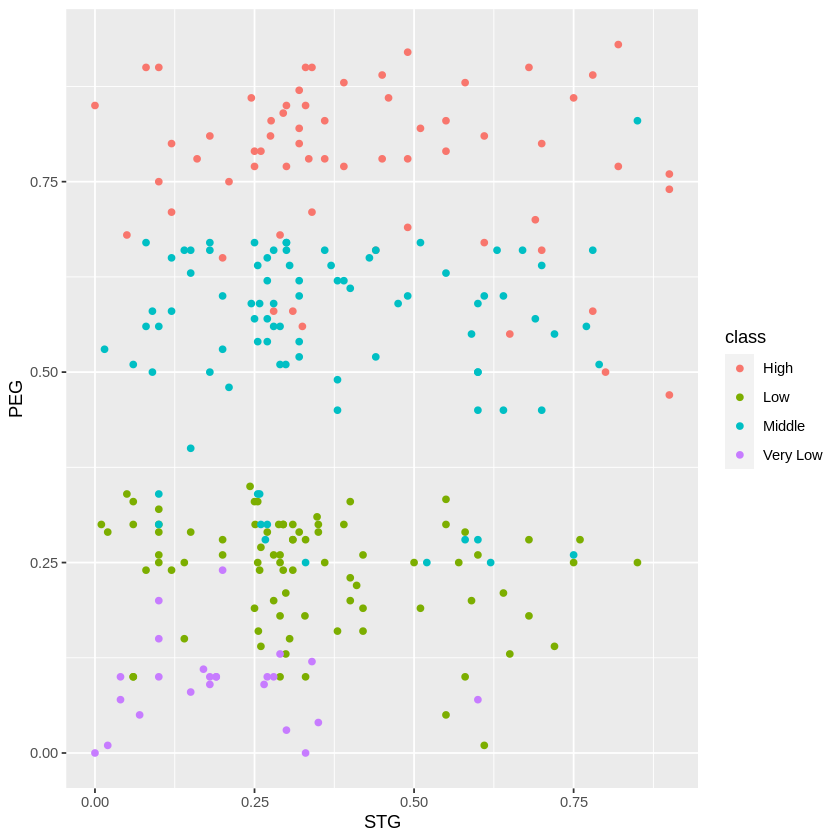

In [7]:
#visualizing initial plot to see which variable has highest influence
initial_plot <- ggplot(knowledge_train, aes(x= SCG, y= PEG, colour = class)) + 
                      geom_point() +
                      xlab("STG") +
                      ylab("PEG")
initial_plot

In [8]:
#creating the recipe

knowledge_recipe <- recipe(class ~ STG + PEG + SCG, data = knowledge_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
knowledge_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [9]:
#Trianing the classifier

#model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

#fitting the data to build classifier
knn_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec) |>
  fit(data = knowledge_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2093023
Best kernel: rectangular
Best k: 5

In [10]:
#Predict the data using the test 
knowledge_test_predictions <- predict(knn_fit, knowledge_test) |>
  bind_cols(knowledge_test)

# knowledge_test_predictions <- knowledge_test_predictions[order(knowledge_test_predictions$.pred_class),]
knowledge_test_predictions

.pred_class,STG,SCG,PEG,class
<fct>,<dbl>,<dbl>,<dbl>,<fct>
High,0.08,0.18,0.85,High
High,0.20,0.20,0.85,High
High,0.22,0.22,0.90,High
⋮,⋮,⋮,⋮,⋮
Very Low,0.52,0.08,0.09,Very Low
Very Low,0.54,0.25,0.11,Very Low
Very Low,0.52,0.28,0.10,Very Low


In [11]:
#accessing the quality of our model
knowledge_test_predictions |>
  metrics(truth = class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7862069


In [12]:
confusion <- knowledge_test_predictions |>
             conf_mat(truth = class, estimate = .pred_class)
confusion

          Truth
Prediction High Low Middle Very Low
  High       34   0      1        0
  Low         0  45     10       14
  Middle      5   1     23        0
  Very Low    0   0      0       12

In [13]:
# create the 25/75 split of the training data into training and validation
knowledge_split <- initial_split(knowledge_train, prop = 0.75, strata = class)
knowledge_subtrain <- training(knowledge_split)
knowledge_validation <- testing(knowledge_split)

# recreate the standardization recipe from before 
# (since it must be based on the training data)
knowledge_recipe <- recipe(class ~ ~ STG + PEG + SCG, 
                        data = knowledge_subtrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec) |>
  fit(data = knowledge_subtrain)

# get predictions on the validation data
validation_predicted <- predict(knn_fit, knowledge_validation) |>
  bind_cols(knowledge_validation)

# compute the accuracy
acc <- validation_predicted |>
  metrics(truth = class, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

[1] 0.7384615

In [14]:
knowledge_vfold <- vfold_cv(knowledge_train, v = 5, strata = class)

knowledge_recipe <- recipe(class ~ STG + PEG + SCG, 
                        data = knowledge_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# fit the knn model 
knn_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = knowledge_vfold)

knn_fit

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          